<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%204/Ejercicios_resueltos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import norm, binom
from math import sqrt, ceil
import random
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1
Una compañía que fabrica y embotella jugo de manzana usa una máquina que llena automáticamente botellas de medio litro. Sin embargo, hay alguna variación en las cantidades de líquido dispensado en las botellas que se llenan.  
Se ha observado que la cantidad dispensada se distribuye aproximadamente normal con una media de 0,5 litros y una desviación estándar de 0,03 litros. Si se elige una botella al azar:

## Ítem a
¿cuál es la probabilidad de que esa botella contenga menos de 0,44 litros?

In [2]:
mu = 0.5 # media
sigma = 0.03 # desviación estándar
dist_botellas = norm(loc = mu, scale = sigma) # distribución normal

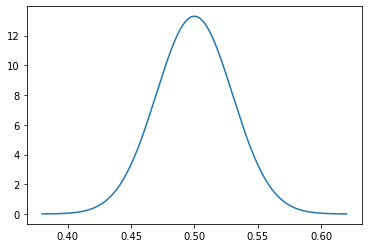

In [3]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, dist_botellas.pdf(x))
plt.show()

In [4]:
print(f'Probabilidad: {dist_botellas.cdf(0.44)*100} %')

Probabilidad: 2.2750131948179195 %


## Ítem b
¿cuál es la probabilidad de que esa botella contenga más de 0,53 litros?

In [5]:
print(f'Probabilidad: {dist_botellas.sf(0.53)*100} %') # sf = survival function

Probabilidad: 15.865525393145685 %


## Ítem c
¿Cuál es la probabilidad de que esa botella contenga entre 0,47 y 0,53 litros?  

In [6]:
print(f'Probabilidad: {(dist_botellas.cdf(0.53)-dist_botellas.cdf(0.47))*100} %')

Probabilidad: 68.26894921370862 %


El criterio para que la botella se tape y se comercialice es que alcance el volumen mínimo equivalente a z=-1,50.

## Ítem d
¿Cuál es el volumen mínimo que debe cargarse en la botella para que esta pueda comercializarse?

In [7]:
import scipy.stats as st
prob_rechazo = st.norm.cdf(-1.50)
print(f'Mínimo: {dist_botellas.ppf(prob_rechazo)} litros')

Mínimo: 0.45499999999999996 litros


Si la producción diaria es de 1.500 botellas,

## Ítem e
¿cuántas botellas se esperan diariamente que sean rechazadas?

In [8]:
N = 1500 # producción diaria de botellas
print(f'Se espera que diariamente se rechacen {round(N*prob_rechazo)} botellas')

Se espera que diariamente se rechacen 100 botellas


## Ítem f
¿cuál es la probabilidad que, tomando una botella al azar, corresponda a una botella rechazada?

In [9]:
print(f'Probabilidad: {binom.pmf(1,N,prob_rechazo)*100} %')

Probabilidad: 9.727725577395332e-42 %


## Ítem g
¿cuál es el volumen correspondiente al percentil 85?

In [10]:
print(f'El volumn correspondiente es de {dist_botellas.ppf(.85)} litros')

El volumn correspondiente es de 0.5310930016848137 litros


La producción se almacena en cajas conteniendo 10 botellas cada caja.

## Ítem h
Si tomamos una caja al azar, ¿cuál es la probabilidad de que exactamente 4 botellas tengan más de 0,53 litros?

In [11]:
print(f'Probabilidad: {binom.pmf(4,10,dist_botellas.sf(0.53))*100} %')

Probabilidad: 4.719337655508036 %


## Ítem i
Las botellas tienen una capacidad máxima de 0,575 litros y la embotelladora tiene una alarma que suena cuando el volumen cargado supera los 0,56 litros.  
Si se disparo la alarma porque el volumen cargado supero los 0,56 litros, ¿cuál es la probabilidad de que la botella haya rebozado?

In [12]:
print(f'Probabilidad: {dist_botellas.sf(0.575)/dist_botellas.sf(0.56)*100} %')

Probabilidad: 27.29507389196999 %


# Ejercicio 2
Se lanza una moneda equilibrada 400 veces. Hallar la probabilidad de que el número de caras sea:

In [13]:
N = 400 # número de ensayos
p = 1/2 # probabilidad de éxito (moneda equilibrada)
q = 1-p # probabilidad de fallar
mu = N*p # media
sigma = sqrt(N*p*q) # desviación estándar
dist_monedas = norm(loc = mu, scale = sigma) # distribución normal

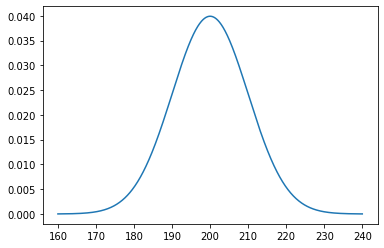

In [14]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, dist_monedas.pdf(x))
plt.show()

## Ítem a
Exactamente 200.

In [15]:
print(f'Probabilidad: {(dist_monedas.cdf(200.5)-dist_monedas.cdf(199.5))*100} %')

Probabilidad: 3.9877611676744973 %


## Ítem b
Mayor a 210.

In [16]:
print(f'Probabilidad: {dist_monedas.sf(210.5)*100} %')

Probabilidad: 14.685905637589592 %


## Ítem c
Entre 200 a 210 inclusive.

In [17]:
print(f'Probabilidad: {(dist_monedas.cdf(210.5)-dist_monedas.cdf(199.5))*100} %')

Probabilidad: 37.307974946247654 %
